In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Model adopted from Glover 2002's paper titled `Hydrodynamics of particle formation following femtosecond laser ablation`. The basics of the model can be summaried by:

$$\rho = \rho_0 \left[ 1 - 0.5 (\gamma - 1) \left( \frac{|v|}{c_0} \right) \right]^{\frac{2}{\gamma - 1}}$$
$$P = P_0 \left[ 1 - 0.5 (\gamma - 1) \left( \frac{|v|}{c_0} \right)^2 \right]^{\frac{\gamma}{\gamma - 1}}$$
$$ T = T_0 \left[ 1 - 0.5 (\gamma - 1) \left( \frac{|v|}{c_0} \right)^2 \right]$$

where $\rho$, $P$, $T$ are the density, pressure, and temperature of the matter, $c_0$ is the sound velocity, $\gamma = C_p/C_v$ is the ratio of specific heat at constant pressure to that at constant volume, and $|v|$ is the speed of the fluid element given by:

$$|v| = \frac{2}{\gamma + 1}\left(c_0 - \frac{x}{t}\right).$$

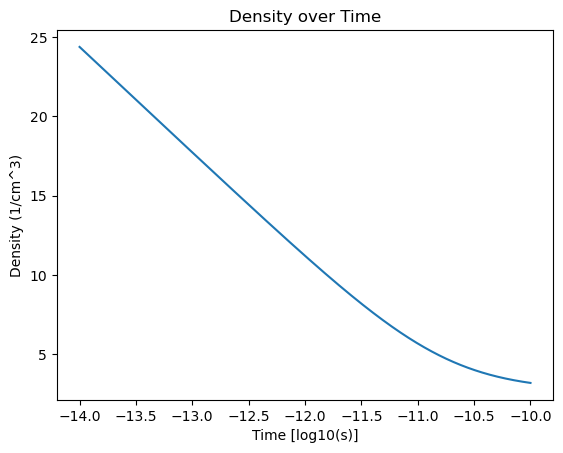

In [254]:
# Defining inital values
x = 1 * 1e-6 # guessed value to be simular scale to time
t = np.logspace(-14, -10, 10000, base=10)
gamma = 1.3 # another guess
c_0 = 8433 # speed of sound Si
rho0 = 1330 # Density of Si


# velocity =  (2 / (gamma + 1)) * (c_0 - (x/t))
rho = rho0 * ( 1 - 0.5 * (gamma - 1) * ((2 / (gamma + 1)) * (c_0 - x / t)) / c_0) ** (2 / (gamma - 1))

# plt.axhline(y=velocity_limit, color='gray', linestyle='--', linewidth=1, alpha=1)
plt.plot(np.log10(t), np.log10(rho))

plt.title("Density over Time")
plt.xlabel('Time [log10(s)]')
plt.ylabel('Density (1/cm^3)')
plt.show()

The above plot is close to what is seen in Glovers paper, expected there is not asymptote for the density. This can be clearly seen in the figure below.
![Screenshot 2024-08-22 at 5.57.33 PM.png](<attachment:Screenshot 2024-08-22 at 5.57.33 PM.png>)

I susspect that this asymptote is due to the 'speed limit' of the fluid velocty imposed by the speed of sound for Silion. In Lunda Lifschitz imposes an the inequality of

$$
|v| \ge 2c_0 / (\gamma - 1)
$$

This speed limit need to be incorpicated into the velocity equation and may give use the asymptote seen in Glovers paper
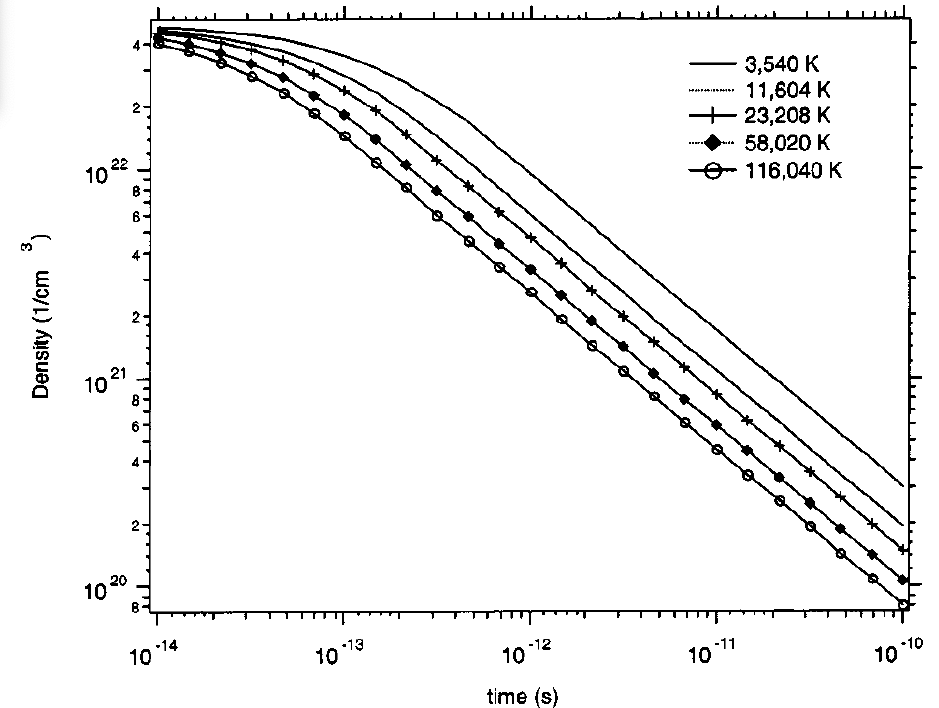

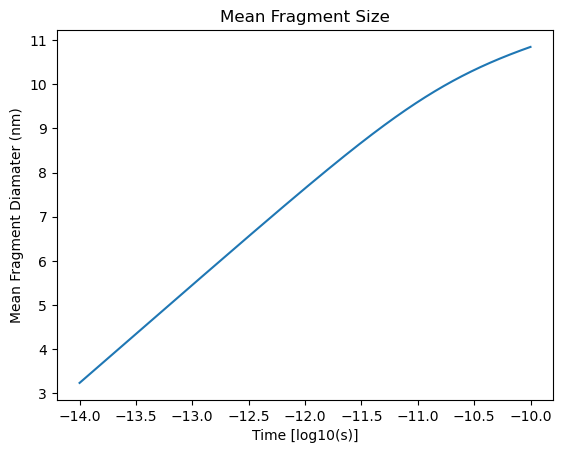

In [262]:
d_rho = np.diff(rho)

# surface energy
S = (3 * (d_rho ** 2) / (5 * rho[:-1] * gamma)) ** (1/3)

# Mean size distribution
d = 6/S

plt.plot(np.log10(t[:-1]), np.log10(d *1e9))

plt.title("Mean Fragment Size")
plt.xlabel('Time [log10(s)]')
plt.ylabel('Mean Fragment Diamater (nm)')
plt.show()